In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import joblib, os


In [48]:
df = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.xls')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
df = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.xls')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [53]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
df.value_counts()

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
60   No         Travel_Rarely   1179       Sales                   16                4          Marketing         1              732             1                        Male    84          3               2         Sales Executive        1                Single         5405           11924        8                   Y       No        14                 3                  4                         80             0        

In [55]:


df = df.copy()  
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if 'Attrition_flag' not in numeric_cols:
    numeric_cols.append('Attrition_flag')

pearson_corr = df[numeric_cols].corr(method='pearson')['Attrition_flag'].drop('Attrition_flag')
pearson_corr = pearson_corr.sort_values(key=lambda s: s.abs(), ascending=False)


cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

cat_cols = [c for c in cat_cols if c != 'Attrition']
cat_corr = {}
for c in cat_cols:
    try:
        dummies = pd.get_dummies(df[c], prefix=c)

        corrs = dummies.apply(lambda col: df['Attrition_flag'].corr(col))

        best = corrs.reindex(corrs.abs().sort_values(ascending=False).index).iloc[0]

        cat_corr[c] = corrs.loc[corrs.abs().idxmax()]
    except Exception as e:
        cat_corr[c] = np.nan

cat_corr_series = pd.Series(cat_corr).dropna().sort_values(key=lambda s: s.abs(), ascending=False)


corr_df = pd.concat([pearson_corr.rename('correlation').to_frame(), 
                    cat_corr_series.rename('correlation').to_frame()]).reset_index().rename(columns={'index': 'feature'})

corr_df = corr_df.drop_duplicates(subset=['feature']).set_index('feature').sort_values('correlation', key=lambda s: s.abs(), ascending=False)

# corr_df.style.format('{:.3f}')

/home/kareem_taha/miniconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/kareem_taha/miniconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_22276/454659537.py:25: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cat_corr[c] = corrs.loc[corrs.abs().idxmax()]


/tmp/ipykernel_22276/298089985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette='vlag')


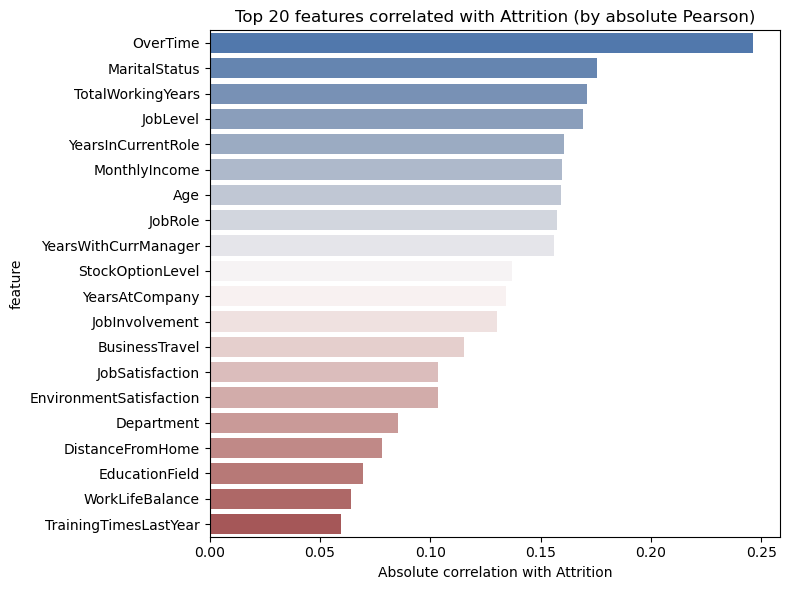

In [56]:

top_n = 20
top = corr_df['correlation'].abs().sort_values(ascending=False).head(top_n)
plt.figure(figsize=(8,6))
sns.barplot(x=top.values, y=top.index, palette='vlag')
plt.xlabel('Absolute correlation with Attrition')
plt.title(f'Top {top_n} features correlated with Attrition (by absolute Pearson)')
plt.tight_layout()
plt.show()

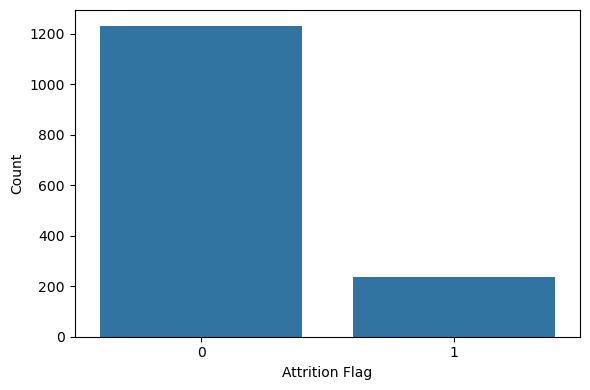

In [57]:
plt.figure(figsize=(6,4))
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
sns.countplot(x='Attrition_flag', data=df)
plt.tight_layout()
plt.show()


In [58]:

if 'Attrition_flag' not in df.columns:
    df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

y = df['Attrition_flag']
X = df.drop(columns=['Attrition', 'Attrition_flag'], errors='ignore')

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='drop'
)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
pipe = Pipeline(steps=[('pre', preprocessor), ('clf', rf)])

pipe.fit(X, y)


cat_ohe = pipe.named_steps['pre'].named_transformers_.get('cat') if hasattr(pipe.named_steps['pre'], 'named_transformers_') else None
if cat_ohe is not None and hasattr(cat_ohe, 'get_feature_names_out'):
    cat_names = list(cat_ohe.get_feature_names_out(cat_features))
elif cat_ohe is not None and hasattr(cat_ohe, 'get_feature_names'):
    try:
        cat_names = list(cat_ohe.get_feature_names(cat_features))
    except Exception:
        cat_names = []
else:
    cat_names = []

feature_names = numeric_features + cat_names
importances = pipe.named_steps['clf'].feature_importances_

imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False).reset_index(drop=True)
imp_df = imp_df.head(25)


/tmp/ipykernel_22276/3161551814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=imp_df, palette='viridis')


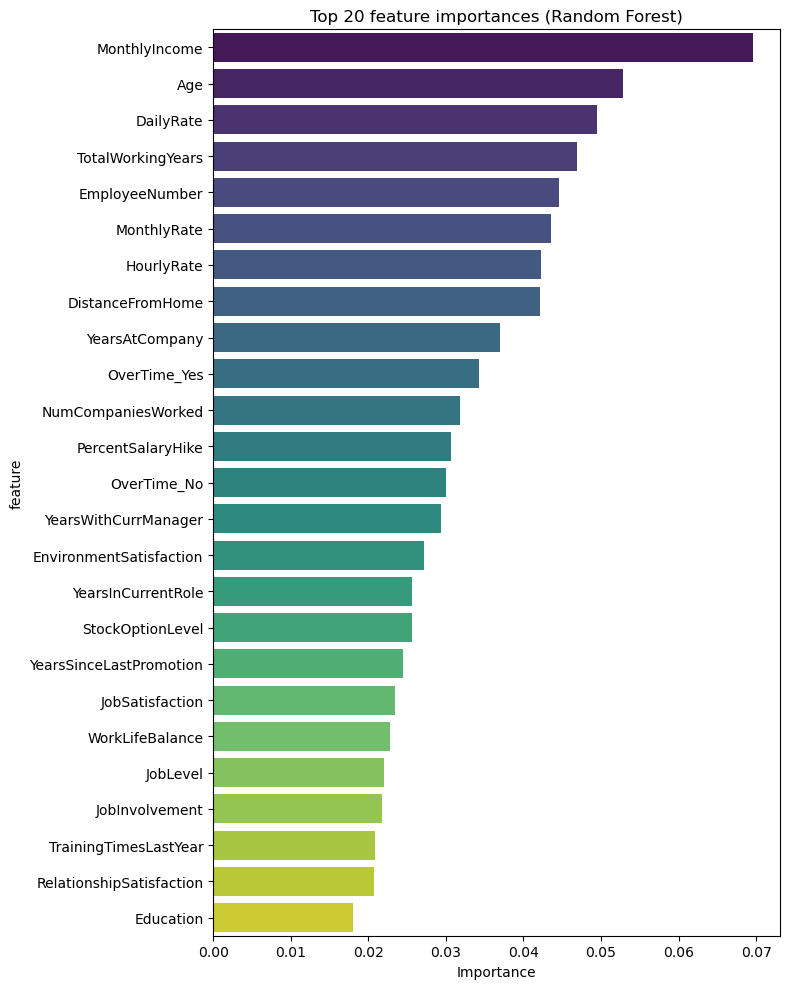

In [59]:

plt.figure(figsize=(8,10))
sns.barplot(x='importance', y='feature', data=imp_df, palette='viridis')
plt.title('Top 20 feature importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [60]:


top_features = imp_df['feature'].tolist()

numeric_top = [f for f in top_features if f in numeric_features]

cat_ohe_top = [f for f in top_features if f not in numeric_features]

outlier_rows = []
for col in numeric_top:
    s = df[col].dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = s[(s < lower) | (s > upper)]
    outlier_rows.append({
        'feature': col,
        'count': len(s),
        'outlier_count': int(outliers.shape[0]),
        'outlier_pct': float(outliers.shape[0]) / max(len(s), 1),
        'min': float(s.min()),
        'q1': float(q1),
        'median': float(s.median()),
        'q3': float(q3),
        'max': float(s.max()),
        'mean': float(s.mean()),
        'std': float(s.std())
    })

outlier_df_num = pd.DataFrame(outlier_rows).set_index('feature') if outlier_rows else pd.DataFrame(columns=['feature'])

cat_rows = []
for name in cat_ohe_top:

    if '_' in name:
        orig = name.split('_', 1)[0]
        level = name[len(orig) + 1:]
        if orig in df.columns:
            try:
                cnt = int((df[orig] == level).sum())
                pct = float(cnt) / len(df)
                cat_rows.append({'feature': name, 'orig_col': orig, 'level': level, 'count': cnt, 'pct': pct})
            except Exception:
                cat_rows.append({'feature': name, 'orig_col': orig, 'level': level, 'count': None, 'pct': None})
        else:

            cat_rows.append({'feature': name, 'orig_col': None, 'level': None, 'count': None, 'pct': None})
    else:
        cat_rows.append({'feature': name, 'orig_col': None, 'level': None, 'count': None, 'pct': None})

outlier_df_cat = pd.DataFrame(cat_rows).set_index('feature') if cat_rows else pd.DataFrame(columns=['feature'])

print('Numeric feature outlier summary (IQR method):')
if not outlier_df_num.empty:
    display(outlier_df_num.style.format({
        'outlier_pct': '{:.2%}', 'min': '{:.3f}', 'q1': '{:.3f}', 'median': '{:.3f}', 'q3': '{:.3f}', 'max': '{:.3f}', 'mean': '{:.3f}', 'std': '{:.3f}'
    }))
else:
    print('No numeric top features found.')

print('\nCategorical / OHE-like top features (counts and percentage):')
if not outlier_df_cat.empty:
    display(outlier_df_cat.style.format({'pct': '{:.2%}'}))
else:
    print('No categorical/OHE top features found.')

Numeric feature outlier summary (IQR method):


,count,outlier_count,outlier_pct,min,q1,median,q3,max,mean,std
feature,,,,,,,,,,
MonthlyIncome,1470,114,7.76%,1009.000,2911.000,4919.000,8379.000,19999.000,6502.931,4707.957
Age,1470,0,0.00%,18.000,30.000,36.000,43.000,60.000,36.924,9.135
DailyRate,1470,0,0.00%,102.000,465.000,802.000,1157.000,1499.000,802.486,403.509
TotalWorkingYears,1470,63,4.29%,0.000,6.000,10.000,15.000,40.000,11.280,7.781
EmployeeNumber,1470,0,0.00%,1.000,491.250,1020.500,1555.750,2068.000,1024.865,602.024
MonthlyRate,1470,0,0.00%,2094.000,8047.000,14235.500,20461.500,26999.000,14313.103,7117.786
HourlyRate,1470,0,0.00%,30.000,48.000,66.000,83.750,100.000,65.891,20.329
DistanceFromHome,1470,0,0.00%,1.000,2.000,7.000,14.000,29.000,9.193,8.107
YearsAtCompany,1470,104,7.07%,0.000,3.000,5.000,9.000,40.000,7.008,6.127



Categorical / OHE-like top features (counts and percentage):


,orig_col,level,count,pct
feature,,,,
OverTime_Yes,OverTime,Yes,416,28.30%
OverTime_No,OverTime,No,1054,71.70%


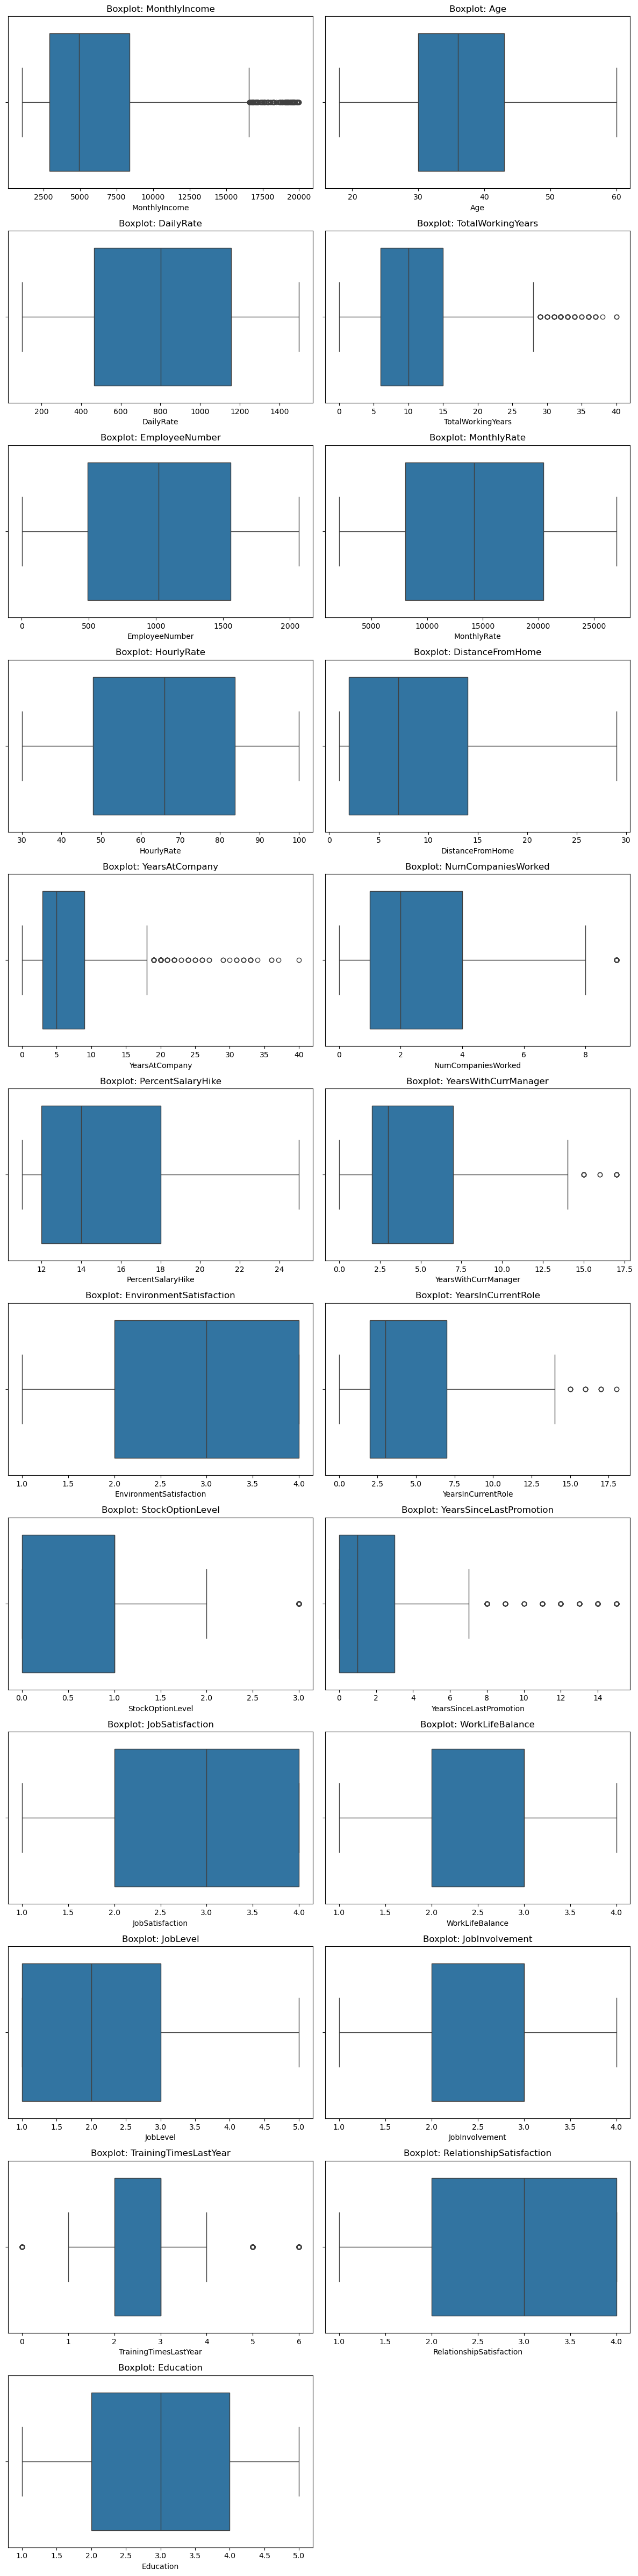

/tmp/ipykernel_22276/3192198095.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[level], y=[cnt], palette='pastel')


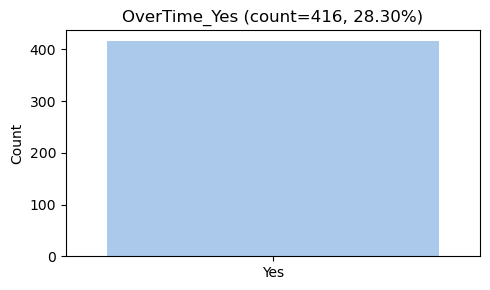

/tmp/ipykernel_22276/3192198095.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[level], y=[cnt], palette='pastel')


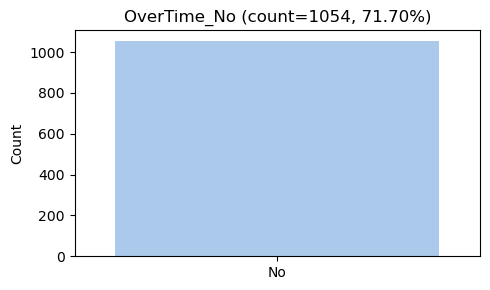

In [61]:

plots_num = numeric_top
plots_cat = cat_ohe_top

if plots_num:
    n = len(plots_num)
    cols = 2
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(6*cols, 4*rows))
    for i, col in enumerate(plots_num, 1):
        plt.subplot(rows, cols, i)
        try:
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot: {col}')
        except Exception as e:
            plt.text(0.5, 0.5, f'Error plotting {col}: {e}', ha='center')
    plt.tight_layout()
    plt.show()
else:
    print('No numeric top features to plot.')
if plots_cat:
    for name in plots_cat:
        if '_' in name:
            orig = name.split('_', 1)[0]
            level = name[len(orig) + 1:]
            if orig in df.columns:
                cnt = int((df[orig] == level).sum())
                pct = cnt / len(df)
                plt.figure(figsize=(5,3))
                sns.barplot(x=[level], y=[cnt], palette='pastel')
                plt.title(f'{name} (count={cnt}, {pct:.2%})')
                plt.ylabel('Count')
                plt.tight_layout()
                plt.show()
            else:
                print(f"Can't find original column for {name}; showing value counts of column if present in df")
                if name in df.columns:
                    display(df[name].value_counts().to_frame())
                else:
                    print('No column named', name)
        else:
            print(f'Feature {name} not clearly OHE formatted; attempting to show df[name] if it exists')
            if name in df.columns:
                display(df[name].value_counts().to_frame())
            else:
                print('No column named', name)
else:
    print('No categorical/OHE top features to plot.')

In [62]:
imp_df['feature']

0                MonthlyIncome
1                          Age
2                    DailyRate
3            TotalWorkingYears
4               EmployeeNumber
5                  MonthlyRate
6                   HourlyRate
7             DistanceFromHome
8               YearsAtCompany
9                 OverTime_Yes
10          NumCompaniesWorked
11           PercentSalaryHike
12                 OverTime_No
13        YearsWithCurrManager
14     EnvironmentSatisfaction
15          YearsInCurrentRole
16            StockOptionLevel
17     YearsSinceLastPromotion
18             JobSatisfaction
19             WorkLifeBalance
20                    JobLevel
21              JobInvolvement
22       TrainingTimesLastYear
23    RelationshipSatisfaction
24                   Education
Name: feature, dtype: object

In [63]:

features = [f for f in imp_df['feature'].astype(str).tolist() if f not in ('OverTime_Yes', 'OverTime_No')]
features_existing = [f for f in features if f in df.columns]

if not features_existing:
	print("No matching columns found in df for selected features:", features)
else:
	df[features_existing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   MonthlyIncome             1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   TotalWorkingYears         1470 non-null   int64
 4   EmployeeNumber            1470 non-null   int64
 5   MonthlyRate               1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   DistanceFromHome          1470 non-null   int64
 8   YearsAtCompany            1470 non-null   int64
 9   NumCompaniesWorked        1470 non-null   int64
 10  PercentSalaryHike         1470 non-null   int64
 11  YearsWithCurrManager      1470 non-null   int64
 12  EnvironmentSatisfaction   1470 non-null   int64
 13  YearsInCurrentRole        1470 non-null   int64
 14  StockOptionLevel          1470 non-null 

In [64]:


y = df['Attrition_flag']
selected_columns = ['Age','DistanceFromHome','MonthlyIncome','EnvironmentSatisfaction','OverTime','JobInvolvement','RelationshipSatisfaction','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','JobSatisfaction']
cols_keep = set()
for f in selected_columns:
    if f in df.columns:
        cols_keep.add(f)
    elif '_' in f:
        orig = f.split('_', 1)[0]
        if orig in df.columns:
            cols_keep.add(orig)
cols_keep.discard('Attrition')
cols_keep.discard('Attrition_flag')


if not cols_keep:
    X = df.drop(columns=['Attrition', 'Attrition_flag'], errors='ignore').copy()
else:
    cols_to_use = [c for c in df.columns if c in cols_keep]
    X = df[cols_to_use].copy()

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(), cat_features)
    ],
    remainder='drop'
)


In [65]:
X.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


models = {
    'svc': SVC(probability=True,kernel='rbf', random_state=42),
    'svc_poly':SVC(probability=True,kernel='poly', random_state=42),
    'svc_linear': SVC(probability=True,kernel='linear', random_state=42),
    'logreg': LogisticRegression(max_iter=1000,l1_ratio=.1,penalty='elasticnet',solver='saga',random_state=42),
    'logreg_l1': LogisticRegression(max_iter=1000,penalty='l1',solver='saga',random_state=42),
    'logreg_l2': LogisticRegression(max_iter=1000,penalty='l2',solver='lbfgs',random_state=42),
    'rf': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'dt': DecisionTreeClassifier(random_state=42),
    
}

In [75]:

results = []

for name, clf in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', clf)])
    pipe.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    results.append({'model': name, 'train_acc': train_acc, 'test_acc': test_acc, 'overfit': abs(train_acc - test_acc), 'pipeline': pipe})
    print(f"Trained {name}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}, overfit={abs(train_acc - test_acc):.4f}")

Trained svc: train_acc=0.8767, test_acc=0.8571, overfit=0.0196
Trained svc_poly: train_acc=0.8903, test_acc=0.8469, overfit=0.0434
Trained svc_linear: train_acc=0.8384, test_acc=0.8401, overfit=0.0017
Trained logreg: train_acc=0.8597, test_acc=0.8707, overfit=0.0111
Trained logreg_l1: train_acc=0.8588, test_acc=0.8707, overfit=0.0119
Trained logreg_l2: train_acc=0.8588, test_acc=0.8707, overfit=0.0119
Trained rf: train_acc=1.0000, test_acc=0.8571, overfit=0.1429
Trained dt: train_acc=1.0000, test_acc=0.7823, overfit=0.2177


In [76]:

est_list = [(n, models[n]) for n in models]
if len(est_list) >= 2:
    voting = Pipeline([('pre', preprocessor), ('voting', VotingClassifier(estimators=est_list, voting='soft', n_jobs=-1))])
    voting.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, voting.predict(X_train))
    test_acc = accuracy_score(y_test, voting.predict(X_test))
    results.append({'model': 'voting', 'train_acc': train_acc, 'test_acc': test_acc, 'overfit': abs(train_acc - test_acc), 'pipeline': voting})
    print(f"Trained voting: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}, overfit={abs(train_acc - test_acc):.4f}")

Trained voting: train_acc=0.8997, test_acc=0.8741, overfit=0.0255


In [77]:


res_df = pd.DataFrame([{'model': r['model'], 'train_acc': r['train_acc'], 'test_acc': r['test_acc'], 'overfit': r['overfit']} for r in results])
res_df = res_df.sort_values(['test_acc', 'overfit'], ascending=[False, True]).reset_index(drop=True)

print('\nModel performance summary:')
display(res_df.style.format({'train_acc': '{:.3f}', 'test_acc': '{:.3f}', 'overfit': '{:.3f}'}))


best = results[0]

results_sorted = sorted(results, key=lambda r: (-r['test_acc'], r['overfit']))
best = results_sorted[0]
print(f"\nSelected best model: {best['model']} with test_acc={best['test_acc']:.4f}, train_acc={best['train_acc']:.4f}, overfit={best['overfit']:.4f}")


os.makedirs('../Models', exist_ok=True)
model_path = os.path.join('../Models', f"best_model_{best['model']}.pkl")
joblib.dump(best['pipeline'], model_path)
print('Saved best model pipeline to', model_path)

best_pipeline = best['pipeline']
best_model_name = best['model']
res_df


Model performance summary:


,model,train_acc,test_acc,overfit
0,voting,0.900,0.874,0.026
1,logreg,0.860,0.871,0.011
2,logreg_l1,0.859,0.871,0.012
3,logreg_l2,0.859,0.871,0.012
4,svc,0.877,0.857,0.020
5,rf,1.000,0.857,0.143
6,svc_poly,0.890,0.847,0.043
7,svc_linear,0.838,0.840,0.002
8,dt,1.000,0.782,0.218



Selected best model: voting with test_acc=0.8741, train_acc=0.8997, overfit=0.0255
Saved best model pipeline to ../Models/best_model_voting.pkl


,model,train_acc,test_acc,overfit
0,voting,0.899660,0.874150,0.025510
1,logreg,0.859694,0.870748,0.011054
2,logreg_l1,0.858844,0.870748,0.011905
3,logreg_l2,0.858844,0.870748,0.011905
4,svc,0.876701,0.857143,0.019558
5,rf,1.000000,0.857143,0.142857
6,svc_poly,0.890306,0.846939,0.043367
7,svc_linear,0.838435,0.840136,0.001701
8,dt,1.000000,0.782313,0.217687
